In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pollutants = ['PM10', 'PM25', 'O3', 'CO', 'NO2', 'SO2']
stations = ['Karpos', 'Centar', 'GaziBaba', 'Lisice', 'Rektorat', 'Miladinovci']

### Merge pollutants for a single station, truncate beginning and end, replace 'None' with np.nan

In [138]:
for station in stations:
    dataframes = []
    for pollutant in pollutants:
        df = pd.read_csv(f'./data/raw-sensor/{station}_{pollutant}')
        df.Value = df.Value.apply(lambda x: np.float32(x) if x != 'None' else np.nan)
        df = df[(df['Timestamp'] > '2004') & (df['Timestamp'] < '2020-04-01')]
        df = df.set_index('Timestamp')
        df = df.rename(columns={"Value": pollutant})
        dataframes.append(df)
    
    df = pd.concat(dataframes, axis=1)
    df.to_csv(f'./data/formatted-sensor/{station}', index=True)

### Plot present vs. missing values

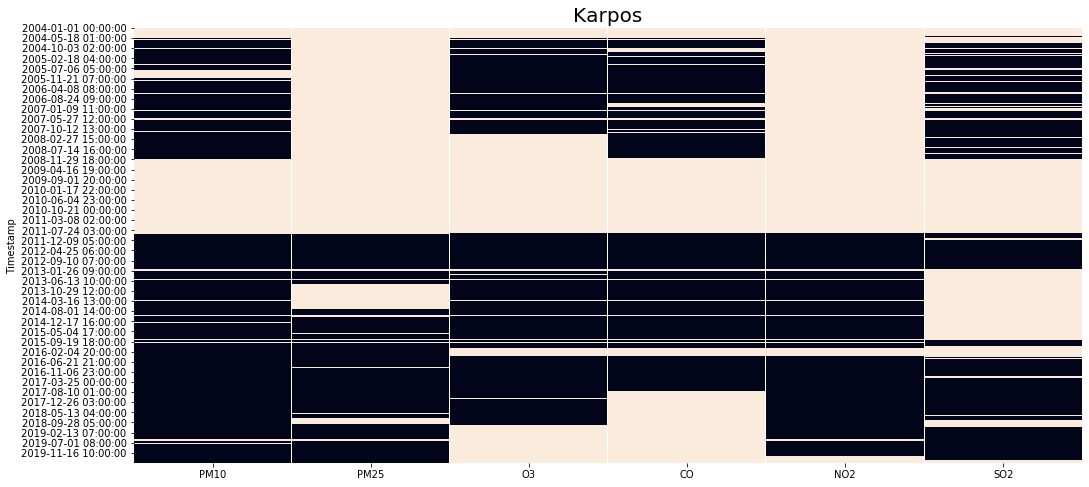

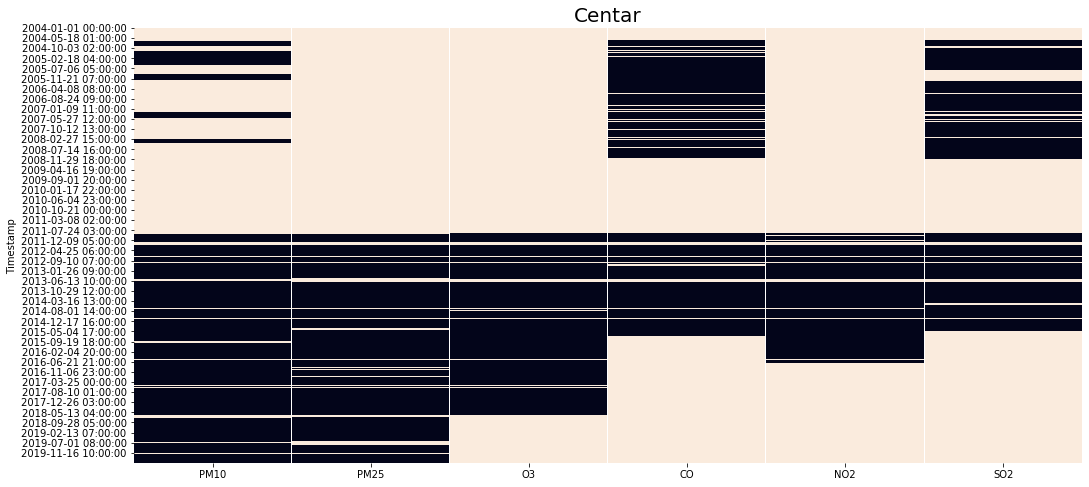

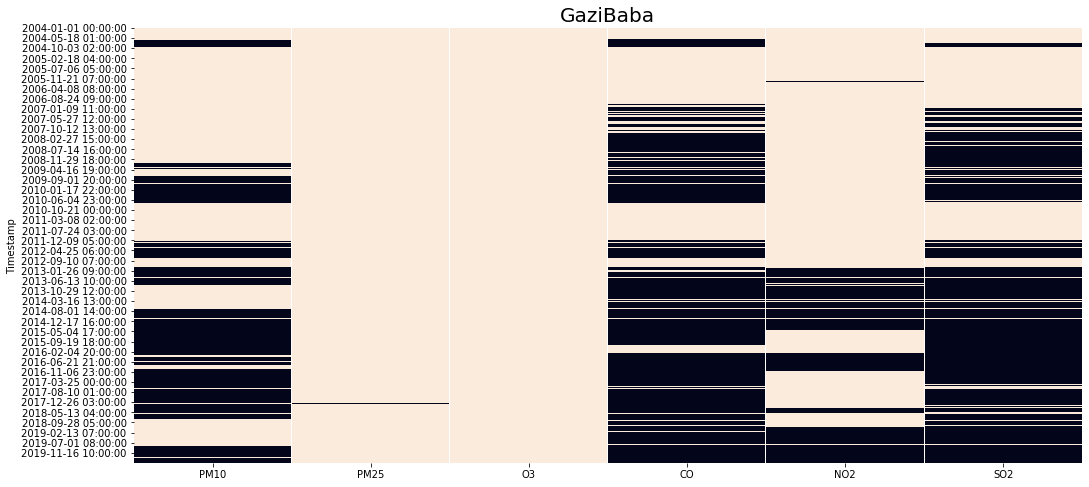

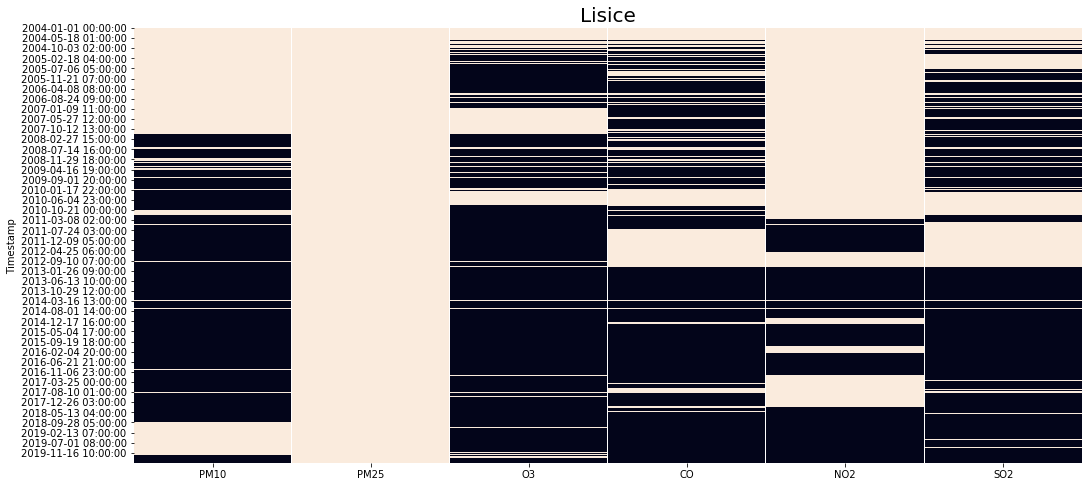

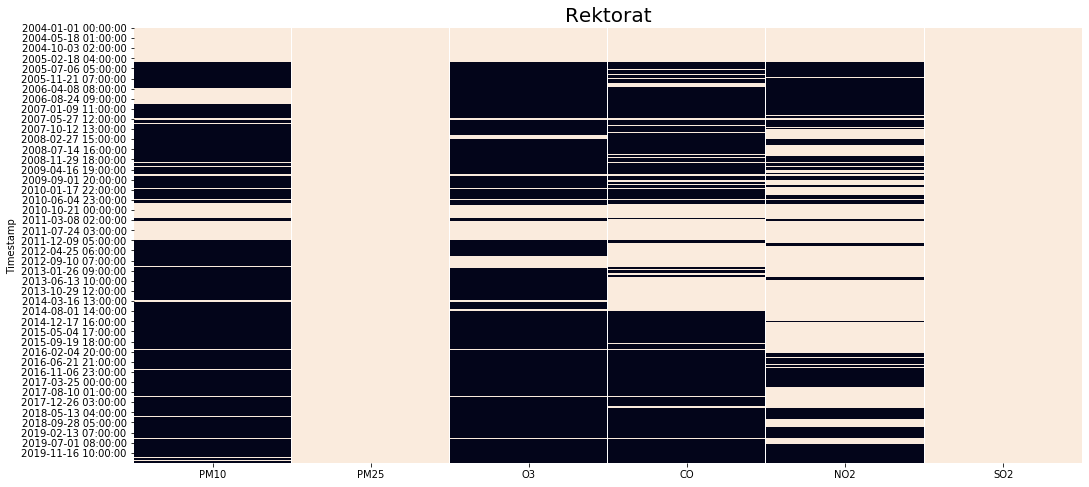

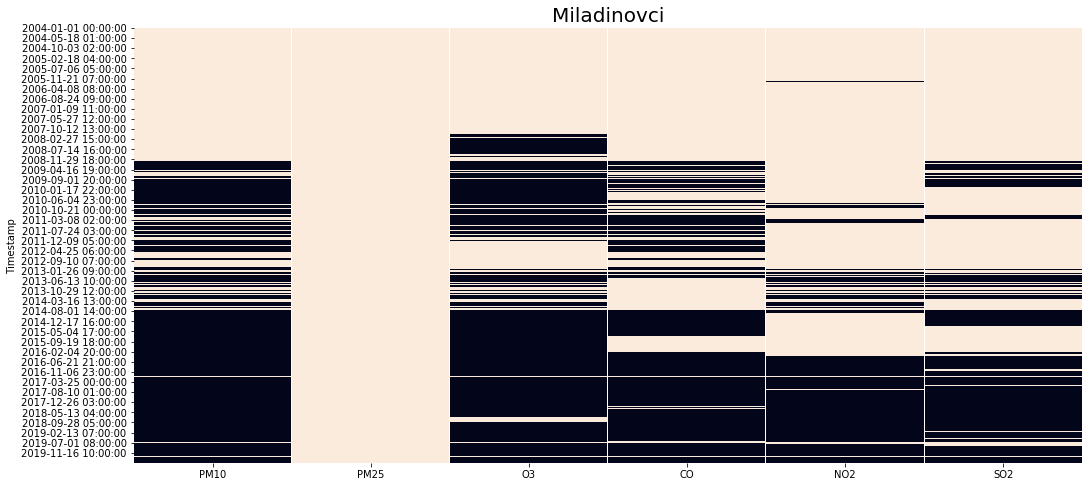

In [140]:
for station in stations:
    df = pd.read_csv(f'./data/formatted-sensor/{station}', index_col=0)
    plt.figure(figsize=(17, 8))
    sns.heatmap(df.isnull(), cbar=False).set_title(f'{station}', fontsize=20)
    plt.show()